## 什么是变量

本节代码包括：
- 从 csv 获取数据
- 查看数据集
- 查看数据基本描述信息
- 查看变量的类型
- 根据指定数据类型读入CSV 
- 查看数据集形状
- 数值型变量（unique取值/直方图）
- 类别型变量（unique取值/直方图）

使用的数据集是著名的 Lending Club 在 Kaggle上的数据集，下载地址 [Kaggle's website](https://www.kaggle.com/wendykan/lending-club-loan-data)。

由于原始 CSV 过大，暂时不上传到仓库里了。请将下载好的 loan.zip 文件解压，放置在 /data 目录下。

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
%matplotlib inline


### 从csv中获取数据

In [8]:
# 从csv中读取数据文件
# 由于原始数据集特征过多，这里定义下要取的列
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

# 读取csv数据，抽样10000行。 注意读取文件的路径！
data = pd.read_csv('../data/titanic.csv', usecols=use_cols)


### 查看数据集

In [9]:
data.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


###  查看数据基本描述信息
- 计数/均值/标准差/最小/最大/百分位值

In [10]:
# 输出各个变量的基本描述信息
data.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,14.526497,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


### 查看变量类型

In [11]:
# 输出各个变量的类型。 注意这里 loan_status 的类型是object，所以无法输出描述信息
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Fare        float64
dtype: object

### 根据指定数据类型读入CSV 

In [12]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived']
dict = {'Pclass':np.object_,
        'Sex':np.object_,
        'Age':np.float64,
        'Fare':np.float64,
        'SibSp':np.int64,
        'Survived':np.int64}

# 读取csv数据。 注意读取文件的路径！
data = pd.read_csv('../data/titanic.csv', usecols=use_cols,dtype=dict)

print(data.dtypes)
print(data.head(5))

Survived      int64
Pclass       object
Sex          object
Age         float64
SibSp         int64
Fare        float64
dtype: object
   Survived Pclass     Sex   Age  SibSp     Fare
0         0      3    male  22.0      1   7.2500
1         1      1  female  38.0      1  71.2833
2         1      3  female  26.0      0   7.9250
3         1      1  female  35.0      1  53.1000
4         0      3    male  35.0      0   8.0500


#### 查看数据集形状

In [13]:
# 数据集的形状
data.shape

(891, 6)

## Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

    factorplot
    boxplot
    violinplot
    stripplot
    swarmplot
    barplot
    countplot


## barplot and countplot 
These very similar plots allow you to get aggregate data off a categorical feature in your data. 

### barplot
is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

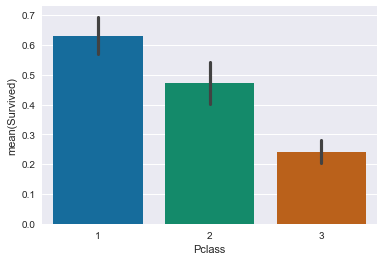

In [26]:
sns.barplot(x='Pclass',y='Survived',data=data)


### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:


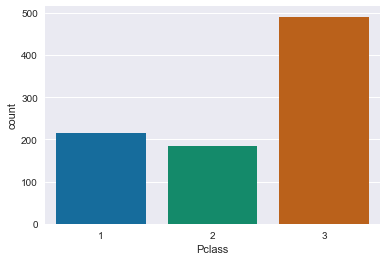

In [27]:
sns.countplot(x='Pclass',data=data)


## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.


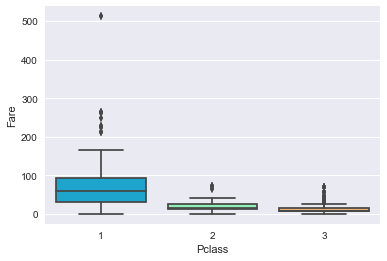

In [24]:
sns.boxplot(x="Pclass", y="Fare", data=data,palette='rainbow')


### violinplot

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.


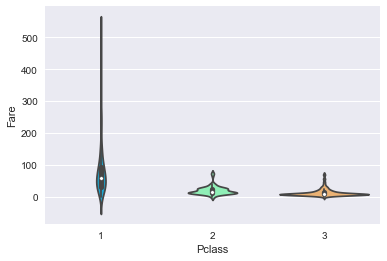

In [25]:
sns.violinplot(x="Pclass", y="Fare", data=data,palette='rainbow')

In [ ]:
https://github.com/egbertli/Machine-Learning-and-Quantitative-analysis/blob/master/Machine_Learning/Data_Visualization/Seaborn/01-Distribution%20Plots.ipynb
    
https://github.com/egbertli/Machine-Learning-and-Quantitative-analysis/blob/master/Machine_Learning/Data_Visualization/Seaborn/03-Matrix%20Plots.ipynb
    
    

### 去重后的取值

In [14]:
# 贷款金额的取值（去重）
data.Survived.unique()

array([0, 1], dtype=int64)

### 直方图

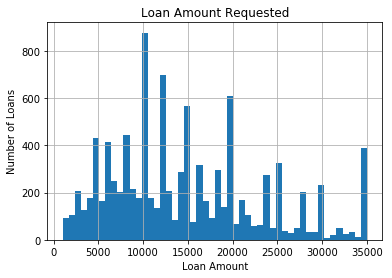

In [14]:
fig = data.loan_amnt.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

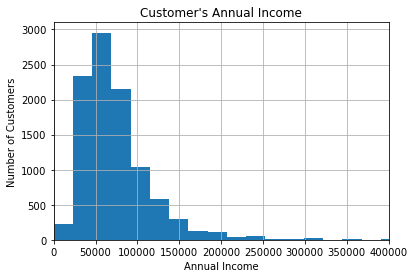

In [15]:
# 年收入的直方图
fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

In [16]:
# 再来看一个离散型数值变量，开户数目
data.open_acc.dropna().unique()

array([  4.,  11.,   6.,  20.,  12.,   5.,   8.,   9.,  18.,  16.,  10.,
        13.,  14.,   7.,  19.,   3.,  15.,  17.,  26.,   2.,  27.,  22.,
        21.,  25.,  23.,  29.,  39.,  24.,  30.,  31.,  28.,  37.,  32.,
        48.,  33.,  34.,   1.,  35.,  36.,  41.,  45.,  40.,  42.])

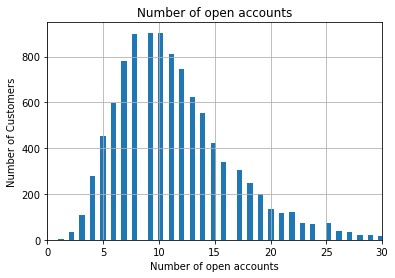

In [17]:
# 直方图
fig = data.open_acc.hist(bins=100)
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

### 单变量分析（类别变量）

In [20]:
# 从csv中读取数据文件
# 由于原始数据集特征过多，这里定义下要取的列
use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']

# 读取csv数据，抽样10000行
data = pd.read_csv('../data/loan.csv', usecols=use_cols).sample(10000, random_state=44)  # set a seed for reproducibility

# 输出数据集的前 5 行
data.head(n=5)

,id,home_ownership,loan_status,purpose
131079,5554979,RENT,Current,debt_consolidation
384935,16552323,OWN,Current,car
73585,8185454,RENT,Fully Paid,credit_card
660814,56180166,RENT,Current,debt_consolidation
349757,16772363,RENT,Current,credit_card


In [23]:
# 房屋所有权的频数分布
data['home_ownership'].value_counts()

MORTGAGE    4957
RENT        4055
OWN          986
OTHER          2
Name: home_ownership, dtype: int64

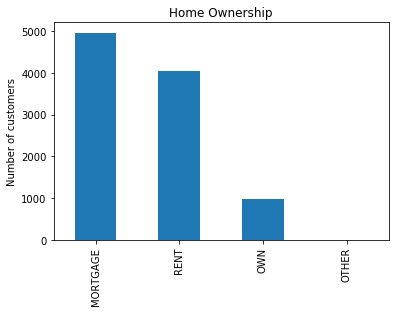

In [24]:
# 频数分布直方图
fig = data['home_ownership'].value_counts().plot.bar()
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

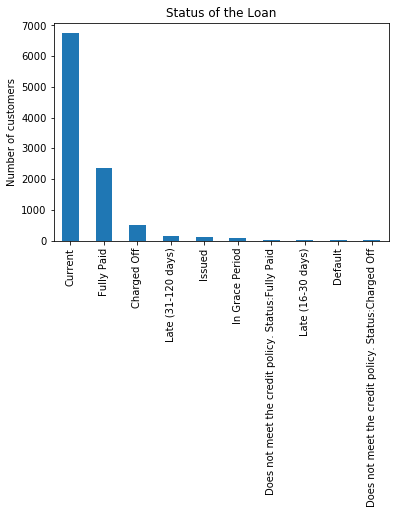

In [25]:
# 贷款状态
fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')